In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Load packages

In [2]:
import pickle
import pathlib
import networkx as nx
import igraph as ig
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import numpy as np
from collections import Counter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.linear_model import LinearRegression

%matplotlib inline

import sys
try:
    sys.path.append('/media/nahuel-ofi/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings_v3 import *
except:
    sys.path.append('/media/nahuel/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings_v3 import *
    
    
fig_dir = '../figs'
net_dir_name = '../networks/ER'

In [8]:
attacks = ['Ran']

N_values = [125, 250, 500, 1000, 2000, 4000, 8000, 16000, 32000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002, 0.001, 0.0005, 0.00025, 0.000125]
dfs = {}
for attack in attacks:
    dfs[attack] = {}
    for N, p in zip(N_values, p_values):

        network_base = 'ER_N{}_p{}'.format(N, p)
        csv_file_name = os.path.join(net_dir_name, network_base, '{}.csv'.format(attack))    
        df = pd.read_csv(csv_file_name, index_col=0)

        dfs[attack][N] = df

0.7355


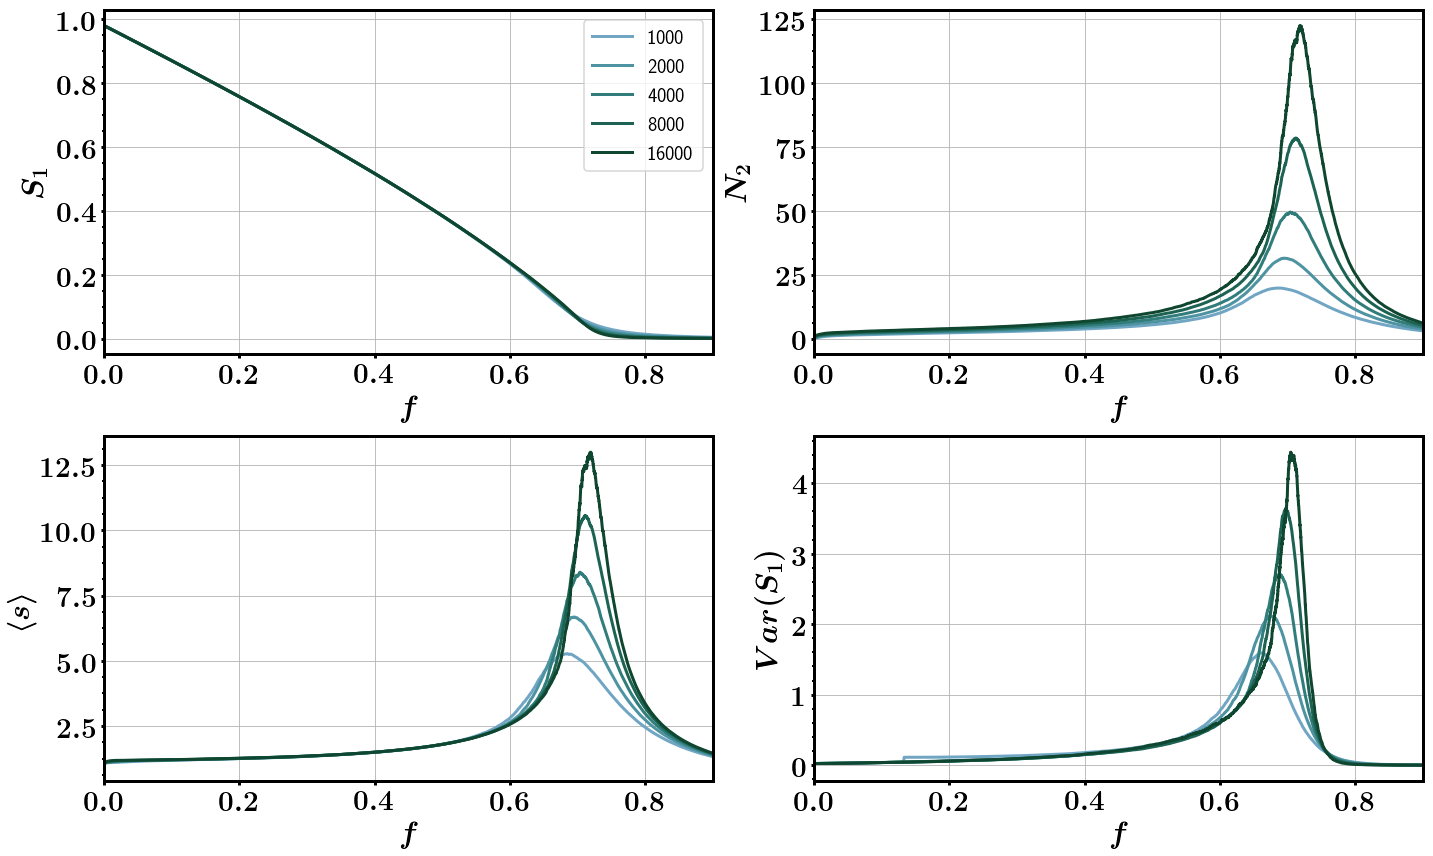

In [29]:
_N_values = N_values[3:-1]

plot_fig2_ran(_N_values, attack)

0.73625


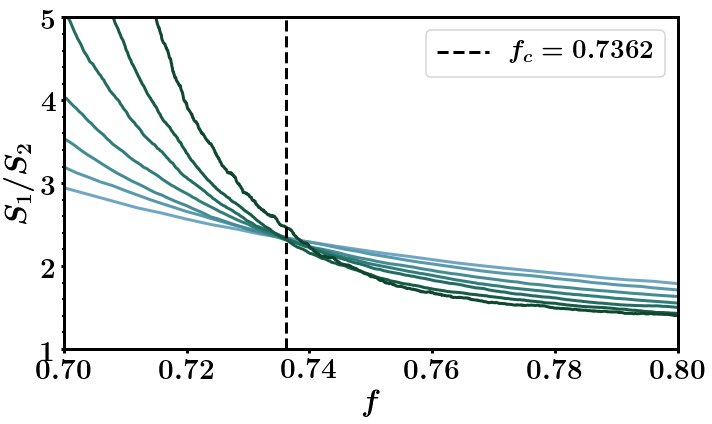

In [31]:
_N_values = N_values[1:-1]
#fc = 0.7359
#fc = 0.7355
fc = compute_fc(dfs, attack, N_values[:-3], min_f, max_f)
print(fc)

plot_crossing_point(fc, _N_values, attack)

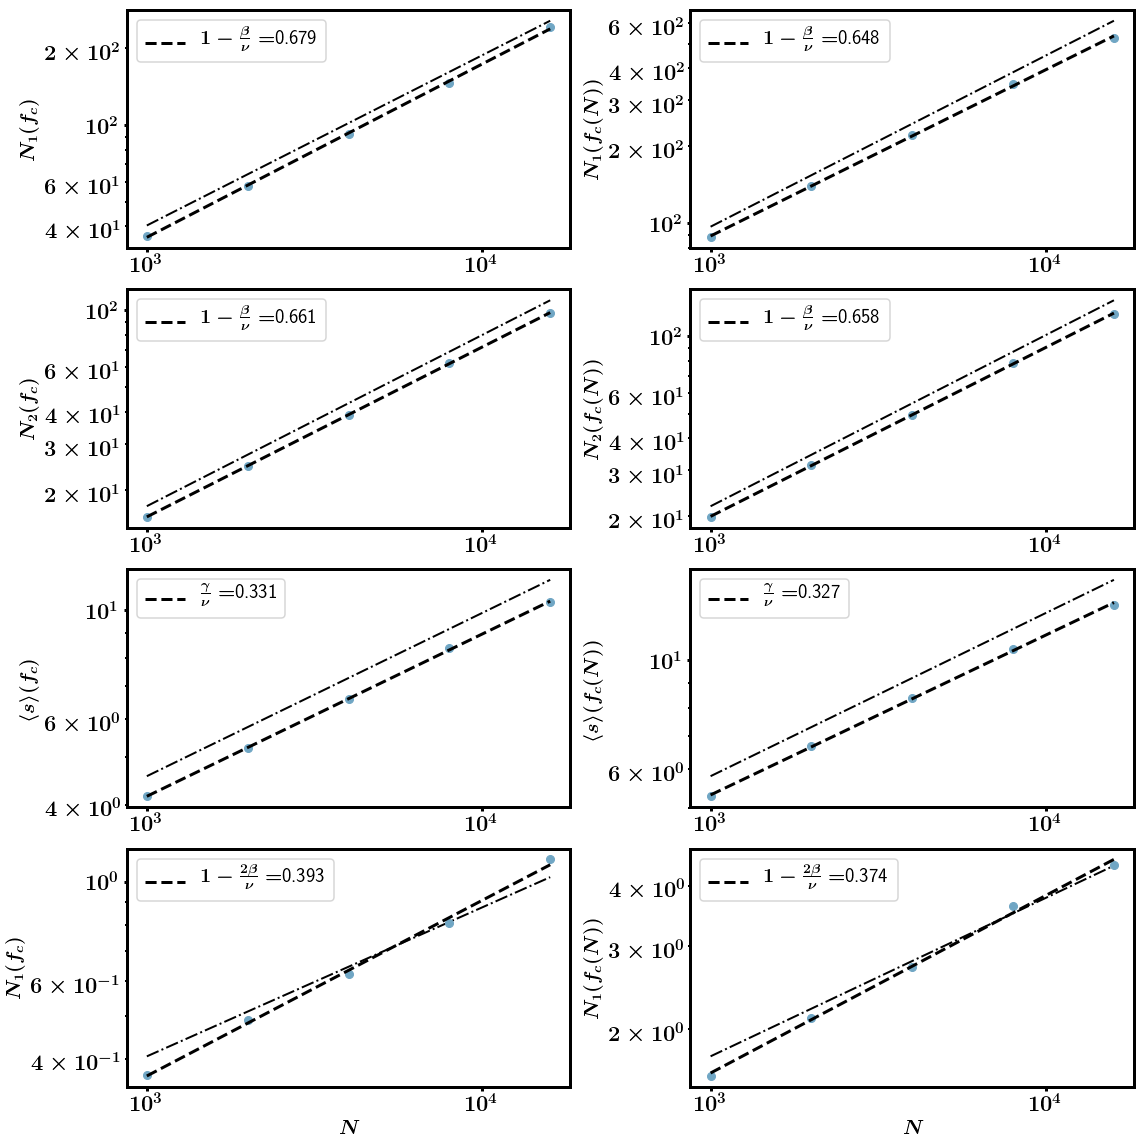

In [15]:
measures= ['meanS2', 'Nsec', 'varSgcc']
peak_values = {}
fc_values = {}
measure_fc_values = {}
for measure in measures:
    fc_values[measure], peak_values[measure] = get_fc_N(dfs, attack, _N_values, measure)
    
ncols = 2
nrows = 4
fig, axes = plt.subplots(figsize=(8*ncols, 4*nrows), ncols=ncols, nrows=nrows)

for measure in measures:
    measure_fc_values[measure] = get_crit_measure_N(dfs, attack, _N_values, measure, fc)
measure_fc_values['Sgcc'] = get_crit_measure_N(dfs, attack, _N_values, 'Sgcc', fc)  
plot_fc_scaling(_N_values, 'Sgcc', axes[0][0], measure_fc_values, peak=False)
plot_fc_scaling(_N_values, 'Nsec', axes[1][0], measure_fc_values, peak=False)
plot_fc_scaling(_N_values, 'meanS2', axes[2][0], measure_fc_values, peak=False)
plot_fc_scaling(_N_values, 'varSgcc', axes[3][0], measure_fc_values, peak=False)

for measure in measures:
    measure_fc_values[measure] = get_crit_measure_N(dfs, attack, _N_values, measure, fc_values[measure])
measure_fc_values['Sgcc'] = get_crit_measure_N(dfs, attack, _N_values, 'Sgcc', fc_values['Nsec'])    
plot_fc_scaling(_N_values, 'Sgcc', axes[0][1], measure_fc_values, peak=True)
plot_fc_scaling(_N_values, 'Nsec', axes[1][1], measure_fc_values, peak=True)
plot_fc_scaling(_N_values, 'meanS2', axes[2][1], measure_fc_values, peak=True)
plot_fc_scaling(_N_values, 'varSgcc', axes[3][1], measure_fc_values, peak=True)
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'ran_fssa_exponents')
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()

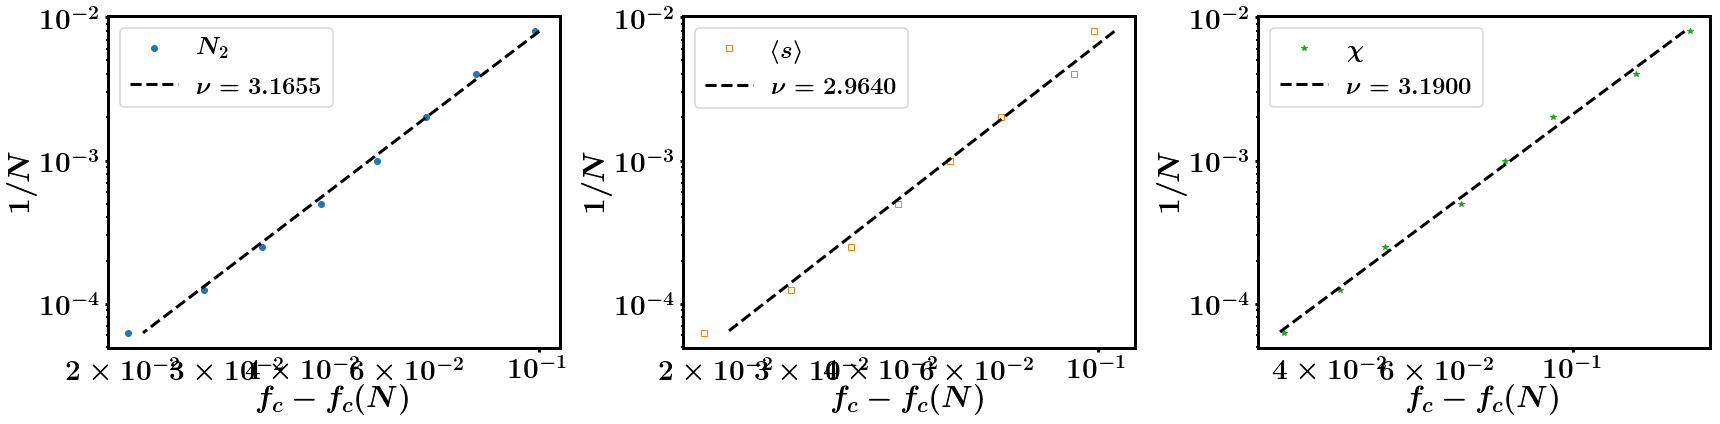

In [27]:
min_f = 0.7
max_f = 0.8
_N_values = N_values[:-1]
fc_values = {}
measure_fc_values = {}
attack = 'Ran'
measures= ['meanS2', 'Nsec', 'varSgcc']
fc = compute_fc(dfs, attack, _N_values, min_f, max_f)
for measure in measures:
    fc_values[measure], _ = get_fc_N(dfs, attack, _N_values, measure)
    measure_fc_values[measure] = get_crit_measure_N(dfs, attack, _N_values, measure, fc_values[measure])
measure_fc_values['Sgcc'] = get_crit_measure_N(dfs, attack, _N_values, 'Sgcc', fc_values['Nsec'])   

plot_fc_N(_N_values, fc_values, attack, fc)

In [ ]:
attack = 'Ran'
N = 16000
p = '0.00025'
f_values = ['0.60', '0.65', '0.70', '0.71', '0.72', '0.73', '0.736']
#f_values = ['0.60', '0.65', '0.70', '0.71', '0.72', '0.73', '0.736']
f_values = ['0.60', '0.65', '0.70', '0.736']
#f_values = ['0.2', '0.223','0.225', '0.227']

all_comp_sizes_dict = {}
all_comp_sizes_dict[N] = {}

base_net_name = 'ER_N{}_p{}'.format(N, p)
base_net_dir_name = os.path.join(net_dir_name, base_net_name)

for f_value in f_values:
    print(f_value)
    comp_sizes_file = os.path.join(base_net_dir_name, 'comp_sizes_{}_f{}.txt'.format(attack, f_value))
    comp_sizes = np.loadtxt(comp_sizes_file, dtype=int)

    all_comp_sizes_dict[N][f_value] = comp_sizes
    
btw_dist_log = {}
btw_dist_log[N] = {}
for i, f_value in enumerate(f_values):
    
    Y = all_comp_sizes_dict[N][f_value]

    mask = Y > 0
    Y = Y[mask]     
    
    min_s = np.min(Y)
    max_s = np.max(Y)

    bins = np.logspace(np.log10(min_s), np.log10(max_s), 15)
    hist = np.histogram(Y, bins=bins, density=True)
    hist_norm = hist[0]
    #widths = (bins[1:] - bins[:-1])
    #hist_norm = hist[0]/widths
    hist_norm[hist_norm==0] = np.NaN
    
    btw_dist_log[N][f_value] = [bins, hist_norm]

def powerlaw(X, a, c):
    return c*X**(-a)
tau = 2.5

def plot_comp_dist(btw_dist_log, f_values, N, attack, tau):

    # log-scaled bins
    ncols = 1
    nrows = 1
    fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
    ax = axes
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$s$')
    ax.set_xlim(0.9, np.max([np.max(elem) for elem in all_comp_sizes_dict[N].values()]))

    ax.set_ylabel(r'$p(s)$')

    for i, f_value in enumerate(f_values):
        bins, hist_norm = btw_dist_log[N][f_value]
        mask = ~np.isnan(hist_norm)
        X = bins[:-1]
        X = X[mask]
        Y = hist_norm[mask]
        ax.plot(X, Y, 'o-', label=r'${{{}}}$'.format(f_value), color=colors[i])

    X = np.logspace(0, 3, 100)
    Y = powerlaw(X, tau, 0.5)
    ax.plot(X, Y, '--', color='k', label=r'$\tau = {{{}}}$'.format(tau))
    legend = ax.legend(loc='best', title=r'$f$', fontsize=20)
    plt.setp(legend.get_title(),fontsize=20)
    
    fig_name = os.path.join(fig_dir, 'comp_sizes_{}'.format(attack))
    plt.savefig(fig_name + '.png')
    plt.savefig(fig_name + '.pdf')
    
    plt.show()
    
def plot_comp_dist_ccdf(all_comp_sizes_dict, f_values, N, attack, tau):    
    # log-scaled bins
    ncols = 1
    nrows = 1
    fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
    ax = axes
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$s$')
    ax.set_xlim(0.9, np.max([np.max(elem) for elem in all_comp_sizes_dict[N].values()]))

    ax.set_ylabel(r'$P(s)$')
    for i, f_value in enumerate(f_values):
        Y = all_comp_sizes_dict[N][f_value]
        sorted_vals, ccdf = get_ccdf(Y)
        ax.plot(sorted_vals, ccdf, '-' , color=colors[i], label=r'${{{}}}$'.format(f_value))

    X = np.logspace(0, 2.2, 100)
    Y = powerlaw(X, tau-1, 1)
    ax.plot(X, Y, '--', color='k', label=r'$\tau - 1 = {{{}}}$'.format(tau-1))
    legend = ax.legend(loc='best', title=r'$f$', fontsize=20)
    plt.setp(legend.get_title(),fontsize=20)
    
    fig_name = os.path.join(fig_dir, 'comp_sizes_ccdf_{}'.format(attack))
    plt.savefig(fig_name + '.png')
    plt.savefig(fig_name + '.pdf')
    plt.show()
    
plot_comp_dist(btw_dist_log, f_values, N, attack, tau)
plot_comp_dist_ccdf(all_comp_sizes_dict, f_values, N, attack, tau)

0.60
0.65
0.70
0.736


In [33]:
def get_ccdf(data):
    """
    Plot the complementary cumulative distribution function
    (1-CDF(x)) based on the data on the axes object.
    
    Note that this way of computing and plotting the ccdf is not
    the best approach for a discrete variable, where many
    observations can have exactly same value!
    """
    # Note that, here we use the convention for presenting an 
    # empirical 1-CDF (ccdf) as discussed above
    sorted_vals = np.sort(np.unique(data))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(data >= val)/n
    return sorted_vals, ccdf

def plot_fig2_ran(N_values, attack):
    
    palette = sns.cubehelix_palette(
        n_colors=len(_N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
    )
    plt.rc('axes', prop_cycle=cycler('color', palette))
    
    ncols = 2
    nrows = 2
    fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

    for ax in axes.flatten():
        ax.set_xlim(0., 0.90)
        ax.grid(True)  

    ax = axes[0][0]
    for N in _N_values:
        ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Sgcc'], label='{}'.format(N))
    ax.set_ylabel(r'$S_1$')
    ax.legend(loc='best', fontsize=20)
    ax.set_xlabel(r'$f$')
    
    ax = axes[0][1]
    for N in _N_values:
        ax.plot(dfs[attack][N]['t'], dfs[attack][N]['Nsec'])
    ax.set_ylabel(r'$N_2$')
    ax.set_xlabel(r'$f$')
    
    ax = axes[1][0]
    for N in _N_values:
        ax.plot(dfs[attack][N]['t'], dfs[attack][N]['meanS2'])
    ax.set_ylabel(r'$\langle s \rangle $')
    ax.set_xlabel(r'$f$')
    
    ax = axes[1][1]
    for N in _N_values:
        ax.plot(dfs[attack][N]['t'], dfs[attack][N]['varSgcc'])
    ax.set_ylabel(r'$Var(S_1)$')
    ax.set_xlabel(r'$f$')
    
    if False:
        ax = axes[1][1]
        for N in _N_values:
            ax.plot(dfs[attack][N]['t'], (N*dfs[attack][N]['Sgcc'])/dfs[attack][N]['Nsec'])
        ax.set_ylabel(r'$S_1/S_2$')
        ax.set_xlabel(r'$f$')        
        ax.set_ylim(1, 5)
        ax.set_xlim(0.7, 0.8)
        ax.axvline(fc, color='k', linestyle='--', label=r'$f_c = {{{:.4f}}}$'.format(fc))
        ax.legend(loc='best')
    
    plt.tight_layout()
    fig_name = os.path.join(fig_dir, 'ran_fssa_fc')
    plt.savefig(fig_name + '.png')
    plt.savefig(fig_name + '.pdf')
    plt.show()
    
def plot_crossing_point(fc, N_values, attack):
    
    palette = sns.cubehelix_palette(
        n_colors=len(_N_values), start=2.0, rot=0.35, gamma=1.0, hue=1.0, light=0.6, dark=0.2,
    )
    plt.rc('axes', prop_cycle=cycler('color', palette))
    
    ncols = 1
    nrows = 1
    fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

    ax = axes
    for N in _N_values:
        ax.plot(dfs[attack][N]['t'], (N*dfs[attack][N]['Sgcc'])/dfs[attack][N]['Nsec'])
    ax.set_ylabel(r'$S_1/S_2$')
    ax.set_xlabel(r'$f$')        
    ax.set_ylim(1, 5)
    ax.set_xlim(0.7, 0.8)
    ax.axvline(fc, color='k', linestyle='--', label=r'$f_c = {{{:.4f}}}$'.format(fc))
    ax.legend(loc='best')
    
    plt.tight_layout()
    fig_name = os.path.join(fig_dir, 'crossing_point_{}'.format(attack))
    plt.savefig(fig_name + '.png')
    plt.savefig(fig_name + '.pdf')
    plt.show()
    
def get_fc_N(dfs, attack, sizes, measure):

    fcs = []
    peaks = []
    for N in sizes:
        idx = dfs[attack][N][measure].idxmax()    
        fcs.append(idx/N)
        peaks.append(dfs[attack][N][measure][idx])
    return np.array(fcs), np.array(peaks)

def get_crit_measure_N(dfs, attack, sizes, measure, fc_values):
    n_sizes = len(sizes)
    if isinstance(fc_values, float):
        fc_values = [fc_values] * n_sizes
        
    crit_values = []    
    for N, fc in zip(sizes, fc_values):
        if measure == 'Sgcc':
            crit_values.append(N*dfs[attack][N][measure][int(fc*N)])
        else:
            crit_values.append(dfs[attack][N][measure][int(fc*N)])
        
    return np.array(crit_values)  

def getLinearReg(sizes, values):
    linear_regressor = LinearRegression() 
    X = np.log(sizes).reshape(-1, 1)
    Y = np.log(values).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    return np.exp(Y_pred), slope
    
def plot_fc_scaling(N_values, measure, ax, measure_fc_values, peak):
    
    def powerlaw(X, a, c):
        return c*np.array(X)**a
    
    
    Y_pred, slope = getLinearReg(N_values, measure_fc_values[measure])
    
    if measure == 'Nsec':
        label = r'$1 - \frac{\beta}{\nu} = $' + '{:.3f}'.format(slope)
        if peak:
            ylabel = r'$N_{2}(f_c(N))$'
        else:
            ylabel = r'$N_{2}(f_c)$'
        a = 0.666666
        c = 1.1*measure_fc_values[measure][0]/N_values[0]**a
        ax.plot(N_values, powerlaw(N_values, a, c), '-.', color='k', linewidth=2)
    if measure == 'meanS2':
        label = r'$\frac{\gamma}{\nu} = $' + '{:.3f}'.format(slope)
        if peak:
            ylabel = r'$\langle s \rangle(f_c(N))$'
        else:
            ylabel = r'$\langle s \rangle(f_c)$'
        a = 0.333333
        c = 1.1*measure_fc_values[measure][0]/N_values[0]**a
        ax.plot(N_values, powerlaw(N_values, a, c), '-.', color='k', linewidth=2)
    if measure == 'Sgcc':
        label = r'$1 - \frac{\beta}{\nu} = $' + '{:.3f}'.format(slope)
        if peak:
            ylabel = r'$N_{1}(f_c(N))$'
        else:
            ylabel = r'$N_{1}(f_c)$'
        a = 0.666666
        c = 1.1*measure_fc_values[measure][0]/N_values[0]**a
        ax.plot(N_values, powerlaw(N_values, a, c), '-.', color='k', linewidth=2)   
        
    if measure == 'varSgcc':
        label = r'$1-\frac{2\beta}{\nu} = $' + '{:.3f}'.format(slope)
        if peak:
            ylabel = r'$N_{1}(f_c(N))$'
        else:
            ylabel = r'$N_{1}(f_c)$'
        a = 0.333333
        c = 1.1*measure_fc_values[measure][0]/N_values[0]**a
        ax.plot(N_values, powerlaw(N_values, a, c), '-.', color='k', linewidth=2)
        
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(which='major', labelsize=22)
    ax.tick_params(which='minor', labelsize=22)
    ax.plot(N_values, measure_fc_values[measure], 'o', markersize=8)    
    ax.plot(N_values, Y_pred, '--', color='k', linewidth=3, label=label)
    ax.legend(loc='best', fontsize=20) 
    if measure == 'varSgcc':
        ax.set_xlabel(r'$N$', fontsize=20) 
    else:
        ax.set_xlabel('') 
    ax.set_ylabel(ylabel, fontsize=20)
    
def compute_fc(dfs, attack, N_values, min_f, max_f):

    N1_over_N2 = {}
    for N in N_values:
        N1_over_N2[N] = ((N*dfs[attack][N]['Sgcc'])/dfs[attack][N]['Nsec']).values

    max_N = N_values[-1]
    mask = np.arange(int(min_f*max_N), int(max_f*max_N))
    n_values = len(mask)
    x = dfs[attack][max_N]['t'][mask].values
    
    s = np.zeros(n_values)
    for Na in N_values:
        for Nb in N_values:
            if Nb <= Na:
                continue
            mask = np.arange(int(min_f*Na), int(max_f*Na))
            xp = dfs[attack][Na]['t'][mask].values
            fp = N1_over_N2[Na][mask]
            Na_values = np.interp(x, xp, fp)

            mask = np.arange(int(min_f*Nb), int(max_f*Nb))
            xp = dfs[attack][Nb]['t'][mask].values
            fp = N1_over_N2[Nb][mask]
            Nb_values = np.interp(x, xp, fp)
            s += np.fabs(1 - Na_values/Nb_values)
        
    fc = min_f + np.argmin(s)/max_N
    return fc

    
def plot_fc_N(N_values, fc_values, attack, fc):
    ncols = 3
    nrows = 1
    fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
    
    linear_regressor = LinearRegression()
    X = np.log(np.array(N_values)).reshape(-1, 1)
    
    X1 = (1/np.array(N_values))
    for ax in axes:
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylabel(r"$1/N$")   
        ax.set_xlabel(r'$f_c-f_c(N)$')

    ax = axes[0]
    ax.plot(fc-fc_values['Nsec'], X1, 'o', color=colors[0], label=r'$N_{2}$')
    Y = np.log(fc-fc_values['Nsec']).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    r2 = linear_regressor.score(X, Y)
    nu = -1/slope
    ax.plot(np.exp(Y_pred), 1/np.exp(X), '--', color='k', label=r'$\nu = {{{:.4f}}}$'.format(nu))
    ax.legend(loc='best', fontsize=24)
    
    ax = axes[1]
    ax.plot(fc-fc_values['meanS2'], X1, 's', color=colors[1], 
            label=r"$\langle s \rangle $", markerfacecolor='none')
    Y = np.log(fc-fc_values['meanS2']).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    r2 = linear_regressor.score(X, Y)
    nu = -1/slope
    ax.plot(np.exp(Y_pred), 1/np.exp(X), '--', color='k', label=r'$\nu = {{{:.4f}}}$'.format(nu))
    ax.legend(loc='best', fontsize=24)
    
    ax = axes[2]
    ax.plot(fc-fc_values['varSgcc'], X1, '*', color=colors[2], label=r"$\chi $")
    Y = np.log(fc-fc_values['varSgcc']).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    r2 = linear_regressor.score(X, Y)
    nu = -1/slope
    ax.plot(np.exp(Y_pred), 1/np.exp(X), '--', color='k', label=r'$\nu = {{{:.4f}}}$'.format(nu))
    ax.legend(loc='best', fontsize=24)
   

    plt.tight_layout()
    fig_name = os.path.join(fig_dir, 'nu_estimation_{}'.format(attack))
    plt.savefig(fig_name + '.png')
    plt.savefig(fig_name + '.pdf')
    plt.show()

In [1]:
def getTau(beta, gamma):
    return (3*gamma + 2*beta) / (gamma + beta)

getTau(0.1, 0.85)

2.8947368421052633